## House Sales prediction of a dataset from King County, USA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
df=pd.read_csv('kc_house_data.csv')

In [4]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
df.shape


(21613, 21)

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

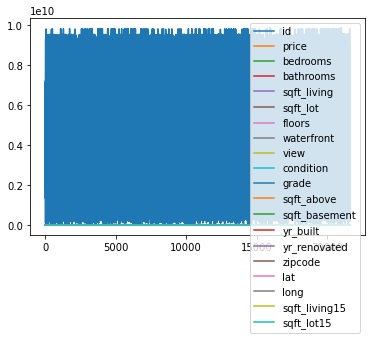

In [9]:
df.plot(kind='line')
plt.show()

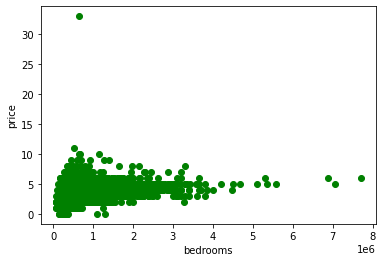

In [10]:
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.scatter(df.price,df.bedrooms,color='green')
plt.show()

In [11]:
feature=df[['bedrooms']]
label=df['price']

In [12]:
reg=linear_model.LinearRegression()
reg.fit(feature,label)

LinearRegression()

In [13]:
reg.predict([[10]])

array([1346963.62143664])

In [14]:
reg.coef_

array([121716.12651184])

In [15]:
reg.intercept_

129802.35631825816

In [16]:
10*121716.12651184+129802.35631825816

1346963.6214366583

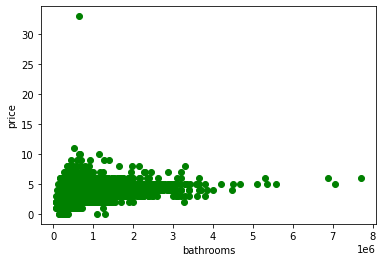

In [17]:
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.scatter(df.price,df.bedrooms,color='green')
plt.show()

In [18]:
feature=df[['bathrooms']]
label=df['price']

In [19]:
reg=linear_model.LinearRegression()
reg.fit(feature,label)

LinearRegression()

In [20]:
reg.predict([[10]])

array([2513973.47155141])

In [21]:
reg.coef_

array([250326.5163021])

In [22]:
reg.intercept_

10708.308530375129

In [23]:
10*250326.5163021+10708.308530375129

2513973.4715513755

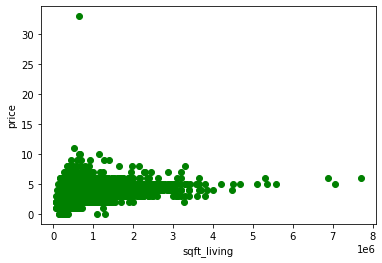

In [24]:
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.scatter(df.price,df.bedrooms,color='green')
plt.show()

In [25]:
feature=df[['sqft_living']]
label=df['price']

In [26]:
reg=linear_model.LinearRegression()
reg.fit(feature,label)

LinearRegression()

In [27]:
reg.predict([[10]])

array([-40774.5074155])

In [28]:
reg.coef_

array([280.6235679])

In [29]:
reg.intercept_

-43580.74309447361

In [31]:
10*280.6235679+ -280.6235679

2525.6121111

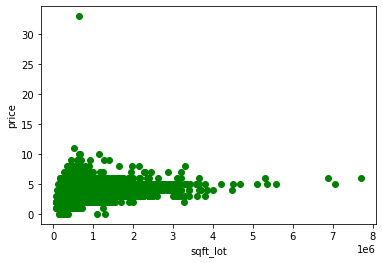

In [32]:
plt.xlabel('sqft_lot')
plt.ylabel('price')
plt.scatter(df.price,df.bedrooms,color='green')
plt.show()

In [33]:
feature=df[['sqft_lot']]
label=df['price']

In [34]:
reg=linear_model.LinearRegression()
reg.fit(feature,label)

LinearRegression()

In [35]:
reg.predict([[10]])

array([528090.55981671])

In [36]:
reg.coef_

array([0.79470145])

In [37]:
reg.intercept_

528082.6128022488

In [38]:
10*0.79470145+528082.6128022488

528090.5598167488

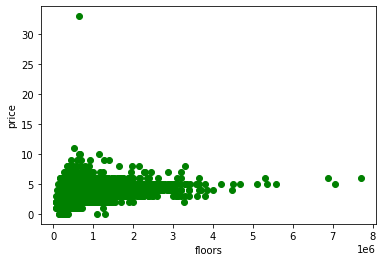

In [46]:
plt.xlabel('floors')
plt.ylabel('price')
plt.scatter(df.price,df.bedrooms,color='green')
plt.show()

In [40]:
feature=df[['floors']]
label=df['price']

In [41]:
reg=linear_model.LinearRegression()
reg.fit(feature,label)

LinearRegression()

In [42]:
reg.predict([[10]])

array([2025086.63701477])

In [43]:
reg.coef_

array([174588.81258204])

In [44]:
reg.intercept_

279198.51119438244

In [45]:
10*174588.81258204+279198.51119438244

2025086.6370147825

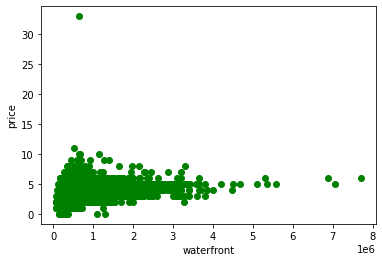

In [47]:
plt.xlabel('waterfront')
plt.ylabel('price')
plt.scatter(df.price,df.bedrooms,color='green')
plt.show()

In [48]:
feature=df[['waterfront']]
label=df['price']

In [49]:
reg=linear_model.LinearRegression()
reg.fit(feature,label)

LinearRegression()

In [50]:
reg.predict([[10]])

array([11834687.84707716])

In [58]:
reg.coef_

array([1130312.42472636])

In [52]:
reg.intercept_

531563.5998135197

In [53]:
10*1130312.42472636+531563.5998135197

11834687.847077118

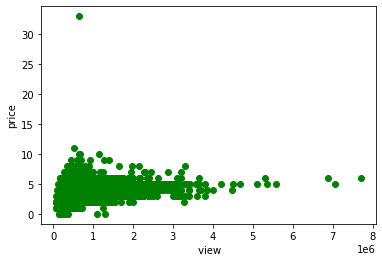

In [54]:
plt.xlabel(' view')
plt.ylabel('price')
plt.scatter(df.price,df.bedrooms,color='green')
plt.show()

In [63]:
feature=df[['view']]
label=df['price']

In [64]:
reg=linear_model.LinearRegression()
reg.fit(feature,label)

LinearRegression()

In [65]:
reg.predict([[10]])

array([2398844.41988287])

In [66]:
reg.coef_

array([190335.24792685])

In [67]:
reg.intercept_

495491.94061437243

In [69]:
10*190335.24792685+495491.94061437243

2398844.419882872